In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
from __future__ import print_function
import numpy as np 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers.core import Dense, Activation, Dropout 
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671)  # for reproducibility

In [10]:
import tensorflow
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

In [4]:
pip install extra-keras-datasets

In [5]:
from extra_keras_datasets import emnist
(input_train, target_train), (input_test, target_test) = emnist.load_data(type='balanced')

**20 epochs OPTIMIZER=RMSprop() N_HIDDEN=128 DROPOUT=0.3**

In [16]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.3
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [11]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

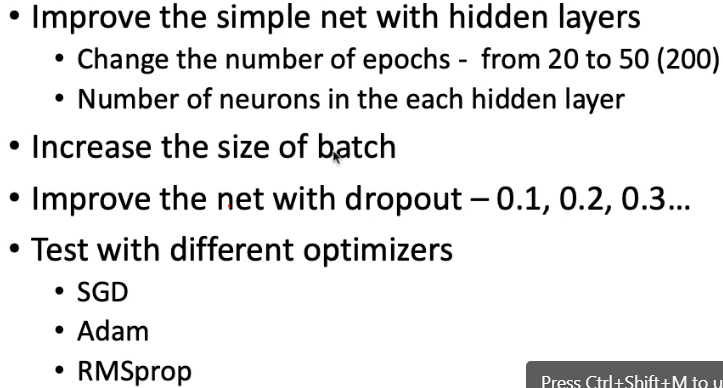

****20 epochs OPTIMIZER=SGD() N_HIDDEN=128 DROPOUT=0.3****

In [12]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = SGD() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.3
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [13]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**20 epochs OPTIMIZER=Adam() N_HIDDEN=128 DROPOUT=0.3**

In [14]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = RMSprop() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.3
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [15]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**20 epochs OPTIMIZER=RMSprop() N_HIDDEN=128 DROPOUT=0.3**
* > **RMSprop() Test accuracy: 0.8179787397384644**
* > **SGD()     Test accuracy: 0.7282978892326355**
* > **Adam()    Test accuracy: 0.8268616795539856**

**Adam() gives the highest accuracy**

**CHECKING ACCURACY OFFERED BY DIFFERENT DROPOUT VALUES**

In [17]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [18]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.2
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [20]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.4
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [22]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.5
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [24]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.6
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [26]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.7
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [28]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.8
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [30]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.9
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [32]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**20 epochs OPTIMIZER=Adam() N_HIDDEN=128**
* > **DROPOUT=0.1 Test accuracy: 0.8397340178489685**
* > **DROPOUT=0.2 Test accuracy: 0.8365957736968994**
* > **DROPOUT=0.3 Test accuracy: 0.8268616795539856**
* > **DROPOUT=0.4 Test accuracy: 0.8129787445068359**
* > **DROPOUT=0.5 Test accuracy:  0.7888829708099365**
* > **DROPOUT=0.6 Test accuracy: 0.7583510875701904**
* > **DROPOUT=0.7 Test accuracy: 0.6955851316452026**
* > **DROPOUT=0.8 Test accuracy: 0.5203191637992859**
* > **DROPOUT=0.9 Test accuracy: 0.12265957146883011**

**20 epochs OPTIMIZER=Adam() N_HIDDEN=128 DROPOUT=0.1**
**CHECK ACCURACY FOR DIFFERENT BATCH SIZES**

In [34]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 8
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [35]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 16
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [37]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 32
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [39]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 64
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [41]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 256
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [44]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 512
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [46]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 1024
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [48]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 2048
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [50]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 4096
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [52]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**20 epochs OPTIMIZER=Adam() N_HIDDEN=128 DROPOUT=0.1**
* > **BATCH SIZE=8 Test accuracy: 0.8101063966751099**
* > **BATCH SIZE=16 Test accuracy: 0.8256914615631104**
* > **BATCH SIZE=32 Test accuracy: 0.8320212960243225**
* > **BATCH SIZE=64 Test accuracy: 0.8372340202331543**
* > **BATCH SIZE=128 Test accuracy: 0.8397340178489685**
* > **BATCH SIZE=256 Test accuracy: 0.8427659869194031**
* > **BATCH SIZE=512 Test accuracy: 0.8389361500740051**
* > **BATCH SIZE=1024 Test accuracy: 0.8339893817901611**
* > **BATCH SIZE=2048 Test accuracy: 0.8191489577293396**
* > **BATCH SIZE=4096 Test accuracy: 0.7967021465301514**

**BATCH SIZE 256 GIVES HIGHEST ACCURACY**

**CHECKING ACCURACY FOR DIFFERENT NUMBERS OF HIDDEN LAYERS**

In [53]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 256
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 8
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [54]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 256
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 16
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [56]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 256
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 32
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [58]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 256
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 64
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [60]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 256
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [62]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [63]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 256
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 256
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [64]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 256
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 512
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [66]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 256
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 1024
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [68]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 256
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 2048
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [70]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [71]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 256
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 4096
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [72]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**20 epochs OPTIMIZER=Adam() N_HIDDEN=128 DROPOUT=0.1 BATCH SIZE=256**
* > **N HIDDEN LAYERS=8 Test accuracy: 0.5306382775306702**
* > **N HIDDEN LAYERS=16 Test accuracy: 0.6433510780334473**
* > **N HIDDEN LAYERS=32 Test accuracy: 0.7499468326568604**
* > **N HIDDEN LAYERS=64 Test accuracy: 0.8101595640182495**
* > **N HIDDEN LAYERS=128 Test accuracy: 0.8421276807785034**
* > **N HIDDEN LAYERS=256 Test accuracy: 0.851808488368988**
* > **N HIDDEN LAYERS=512 Test accuracy: 0.8484574556350708**
* > **N HIDDEN LAYERS=1024 Test accuracy: 0.8476595878601074**
* > **N HIDDEN LAYERS=2048 Test accuracy: 0.8463298082351685**
* > **N HIDDEN LAYERS=4096 Test accuracy: 0.846861720085144**


**256 HIDDEN NEURONS GIVE THE BEST ACCURACY**

**OPTIMIZER=Adam() N_HIDDEN=256 DROPOUT=0.1 BATCH SIZE=256**

In [73]:
# network and training
NB_EPOCH = 30
BATCH_SIZE = 256
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 256
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [74]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
# network and training
NB_EPOCH = 40
BATCH_SIZE = 256
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 256
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [76]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [77]:
# network and training
NB_EPOCH = 50
BATCH_SIZE = 256
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 256
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [78]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [79]:
# network and training
NB_EPOCH = 200
BATCH_SIZE = 256
VERBOSE = 1
NB_CLASSES = 47 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 256
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
#X_train is 112800 rows of 28x28 values --> reshaped in 112800 x 784
DROPOUT=0.1
RESHAPED = 784
#
X_train = input_train.reshape(112800, RESHAPED)
X_test = input_test.reshape(18800, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(target_train, NB_CLASSES)
Y_test = np_utils.to_categorical(target_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [80]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**OPTIMIZER=Adam() N_HIDDEN=256 DROPOUT=0.1 BATCH SIZE=256**
* > **NB_EPOCH=20 Test accuracy: 0.851808488368988**
* > **NB_EPOCH=30 Test accuracy: 0.8517553210258484**
* > **NB_EPOCH=40 Test accuracy: 0.8477127552032471**
* > **NB_EPOCH=50 Test accuracy: 0.853723406791687**
* > **NB_EPOCH=200 Test accuracy: 0.8395212888717651**

**NB_EPOCH=50 gives the best accuracy**

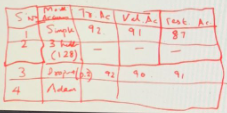

In [89]:
Train_accuracy1=0.8269
Train_accuracy2=0.8180
Train_accuracy3=0.8397
Train_accuracy4=0.8428
Train_accuracy5=0.8102
Train_accuracy6=0.8537
Validation_accuracy1=0.8245
Validation_accuracy2=0.8147
Validation_accuracy3=0.8390
Validation_accuracy4=0.8393
Validation_accuracy5=0.8095
Validation_accuracy6=0.8492
Test_accuracy1=0.8268616795539856
Test_accuracy2=0.8179787397384644
Test_accuracy3=0.8397340178489685
Test_accuracy4=0.8427659869194031
Test_accuracy5=0.8101595640182495
Test_accuracy6=0.853723406791687
Model1="Simple"
Model2="Adam()"
Model3="DROPOUT_0.1"
Model4="BATCH_SIZE_256"
Model5="N_HIDDEN_256"
Model6="NB_EPOCHS_50"

In [92]:
info = {'SNO.':[1,2,3,4,5,6],'Model':[Model1,Model2,Model3,Model4,Model5,Model6], 'Train accuracy':[Train_accuracy1,Train_accuracy2,Train_accuracy3,Train_accuracy4,Train_accuracy5,Train_accuracy6], 'Validation accuracy':[Validation_accuracy1,Validation_accuracy2,Validation_accuracy3,Validation_accuracy4,Validation_accuracy5,Validation_accuracy6],'Test accuracy':[Test_accuracy1,Test_accuracy2,Test_accuracy3,Test_accuracy4,Test_accuracy5,Test_accuracy6]}

In [97]:
pip install tabulate

In [103]:
from tabulate import tabulate

In [106]:
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=range(1,7)))

In [111]:
for i in range(100, 109):
    plt.subplot(330 + (i+1))
    plt.imshow(input_train[i], cmap=plt.get_cmap('gray'))

In [134]:
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
HEIGHT = 28
WIDTH = 28

In [136]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(HEIGHT, WIDTH,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))

model.summary()

In [137]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [142]:
(input_train, target_train), (input_test, target_test) = emnist.load_data(type='balanced')

In [172]:
plt.imshow(input_test[0])

In [168]:
for i in range(100, 109):
    plt.subplot(330 + (i+1))
    plt.imshow((input_test[i]), cmap=plt.get_cmap('gray'))

In [150]:
plt.imshow(input_train[0])

In [188]:
import cv2 as cv
from matplotlib import pyplot as plt
import pytesseract

img = cv.imread("../input/emnist-jpeg/EMNIST/1/char_100812.jpeg") 
#cv.rectangle(img,(29,2496),(604,2992),(255,0,0),5)
plt.imshow(img)

In [190]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# train set / data 
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255

# train set / target 
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)

In [195]:
model = Sequential()
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, 
                    batch_size=256, 
                    epochs=50,  
                    verbose=1)

In [196]:
predictions = model.predict(x_train)
n = 0
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.title(np.argmax(predictions[n], axis=0))
plt.show()

In [193]:
import numpy as np
import cv2

def input_prepare(img):
    img = np.asarray(img)              # convert to array 
    img = cv2.resize(img, (28, 28 ))   # resize to target shape 
    img = cv2.bitwise_not(img)         # [optional] my input was white bg, I turned it to black - {bitwise_not} turns 1's into 0's and 0's into 1's
    img = img / 255                    # normalize 
    img = img.reshape(1, 784)          # reshaping 
    return img 

img = cv2.imread('../input/emnist-jpeg/EMNIST/16/char_100356.jpeg')
orig = img.copy() # save for plotting later on 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray scaling 
img = input_prepare(img)
print(img.shape)


pred = model.predict(img)
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.title(np.argmax(pred, axis=1))
plt.show()